Please upload your submission into the google forms with the file named in the format of fullname_role.ipynb. For instance, JohnTan_JuniorAnalyst.ipynb

## Question 1

a. Write a function that generates a list of prime numbers, up till the Nth prime number.

In [7]:
import sys
sys.setrecursionlimit(10000)

def solution_1a(N):
    '''
    Type your answer below
    '''
    if N == 1:
        return [2]
    
    previous_primes = solution_1a(N-1)
    new_prime = previous_primes[-1] + 1
    
    while any(new_prime%prime==0 for prime in previous_primes):
        new_prime += 1
        
    return previous_primes + [new_prime]

b. Write a function that takes in an integer, N, and returns the Nth character in a string of all prime numbers concatenated together (i.e "23571113...").
<br>
<br>
<b>NOTE:</b> The string of prime numbers is not provided. <b>DO NOT HARDCODE</b> the string of prime numbers.


In [11]:
def solution_1b(N):
    '''
    Type your answer below
    '''
    return "".join(str(prime) for prime in solution_1a(N))

## Question 2

The dataset below contains movies from the IMDb database. The dataset is messy and has plenty of errors to be corrected. 
<br>
<br>
For this section, pick <b>any 2 </b>messy columns to clean. Some examples may include:
<ul>
  <li>Ensuring columns are in the right format for use cases, and are standardised across rows</li>
  <li>Dealing with NA values or blanks</li>
  <li>Ensuring that classes in each column are standardised</li>
</ul>
<br>
<b>NOTE:</b> Indicate clearly which 2 columns are being cleaned, and the steps taken. Points are awarded based on the impact of cleaning. No extra points are awarded for cleaning more than 2 columns.

In [44]:
import numpy as np
import pandas as pd
import re
%matplotlib inline

In [84]:
df2 = pd.read_csv("../../BACT/junioranalyst_q2.csv", sep=";")

In [19]:
df2.head()

,IMBD title ID,Original title,Release date,Genre,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,"Score,,,,"
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,"9.3,,,,"
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,"9.2,,,"
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,"9.,,"
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,35,783",1.098.714,"9,0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f,,"


### Release Date

In [85]:
def pad_year(num: str) -> str:
    ## Adds a 19 to the front of the year if it is too short
    if len(num) == 2:
        return "19"+num
    return num

def pad_number(num: str) -> str:
    ## Adds a 0 in front of the month or day if it is too short
    if len(num) == 1:
        return "0"+num
    return num

def month_mapper(date: str) -> str:
    ## Obtains the padded month number based on text
    month_list = [
        "JAN",
        "FEB",
        "MAR",
        "APR",
        "MAY",
        "JUN",
        "JUL",
        "AUG",
        "SEP",
        "OCT",
        "NOV",
        "DEC"
    ]
    month = re.findall(re.compile("|".join(month_list)), date.upper())[0]
    return pad_number(str(month_list.index(month)+1))

def date_cleaner(date: str) -> str:
    try:
        numbers = re.findall("\d+", date)
        
        ## If not a full regex capture is successful, then likely the date has words
        if len(numbers) != 3:
            month = month_mapper(date)
            numbers.insert(1, month)
        
        ## Once the above month has been processed, then check where the year is
        if len(numbers[2]) == 4:
            year = numbers[2]
            month = pad_number(numbers[1])
            day = pad_number(numbers[0])
        ## This handles two scenarios where either the year is the first number, or the year is too short
        else:
            year = pad_year(numbers[0])
            month = pad_number(numbers[1])
            day = pad_number(numbers[2])
            
        ## Returns the data based on the most common format
        ## I assume we are just cleaning it, so no need for the datetime shenanigans
        return f"{year}-{month}-{day}"
        
    except Exception as e:
        print(str(date) + ": " + str(e))
        return date

df2["Release date"] = df2["Release date"].apply(date_cleaner)

nan: expected string or bytes-like object


### Votes

In [86]:
def votes_cleaner(votes: str) -> int:
    try:
        ## Even though it is all fullstops, we cannot assume it's always true, so might as well
        numbers = re.findall("\d+", votes)
        return int("".join(numbers))
    except Exception as e:
        print(str(votes) + ": " + str(e))
        return np.nan

df2["Votes"] = df2["Votes"].apply(votes_cleaner)

nan: expected string or bytes-like object


## Question 3
The dataset below contains salaries of people in data-related careers.
<br>   
Using the dataset below, come up with <b> 2 interesting visualisations </b> and describe the key insights derived from them. 

In [96]:
df3 = pd.read_csv("../../BACT/junioranalyst_q3.csv")

In [97]:
df3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


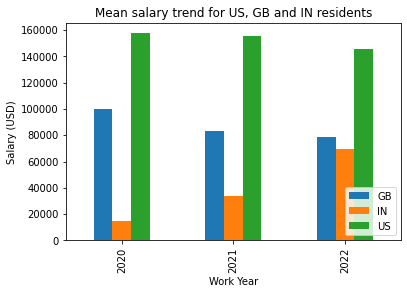

In [134]:
ax = df3[df3.employee_residence.str.contains("US|GB|IN")]\
    .groupby(["work_year", "employee_residence"])\
    .agg("mean")\
    .salary_in_usd.unstack()\
    .plot.bar(
        xlabel="Work Year",
        ylabel="Salary (USD)",
        title="Mean salary trend for US, GB and IN residents",
    )
ax.legend(loc="lower right")

### Mean Salary Trend for US, GB and IN residents
India sees an sharp upward trend in mean salary while the UK and the US both see downward trends.

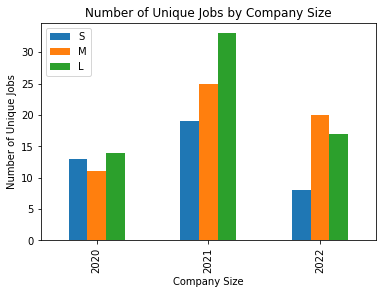

In [136]:
sorter = ["S", "M", "L"]
df3.company_size = df3.company_size.astype("category")
df3.company_size.cat.set_categories(sorter)

ax = df3.groupby(["work_year", "company_size"])\
    .job_title\
    .nunique()\
    .unstack()\
    .plot.bar(
        xlabel="Company Size",
        ylabel="Number of Unique Jobs",
        title="Number of Unique Jobs by Company Size"
    )
ax.legend(loc="upper left")

### Number of Unique Jobs by Company Size
2021 showed the most number of job titles, and larger companies tend to have more unique job titles in general.